In [105]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\sarah\OneDrive\Documents\MS DATA SCIENCE\Capstone Project\Repo\geo-health-ai\Working_Files


In [107]:
# Load PLACES Data
df_places = pd.read_csv('../data/PLACES.csv')

# Head of PLACES
print(df_places.head())

  StateAbbr StateDesc CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AL   Alabama    Autauga        1001  1001020100             1912   
1        AL   Alabama    Autauga        1001  1001020200             2170   
2        AL   Alabama    Autauga        1001  1001020300             3373   
3        AL   Alabama    Autauga        1001  1001020400             4386   
4        AL   Alabama    Autauga        1001  1001020500            10766   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0               12.3      (10.3, 14.9)                 30.0   
1               18.2      (15.7, 20.9)                 30.1   
2               14.6      (12.4, 17.2)                 31.2   
3               11.1      ( 9.2, 13.4)                 32.8   
4               11.4      ( 9.2, 14.0)                 27.1   

  ARTHRITIS_Crude95CI  ...  OBESITY_Crude95CI PHLTH_CrudePrev  \
0        (28.6, 31.4)  ...       (32.7, 35.9)            12.8   
1        (29.0, 31.2)  ...  

In [108]:
# Load FARA Data
df_FARA = pd.read_csv('../data/FARA.csv')

# Head of FARA
print(df_FARA.head())

   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1         214.0       888.

In [109]:
# FARA Copy for Cleaning
FARA_Clean = df_FARA.copy()

In [110]:
# Filter df to only include State of Arizona:
FARA_Clean = (FARA_Clean[FARA_Clean['State'] == 'Arizona'])

# Keep only few columns:
FARA_Clean = FARA_Clean[['CensusTract','County','Urban','Pop2010','LowIncomeTracts','PovertyRate','laaian1','laaian1share','TractHUNV','TractSNAP']]

In [111]:
FARA_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 1345 to 2864
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      1520 non-null   int64  
 1   County           1520 non-null   object 
 2   Urban            1520 non-null   int64  
 3   Pop2010          1520 non-null   int64  
 4   LowIncomeTracts  1520 non-null   int64  
 5   PovertyRate      1520 non-null   float64
 6   laaian1          1088 non-null   float64
 7   laaian1share     1088 non-null   float64
 8   TractHUNV        1520 non-null   float64
 9   TractSNAP        1520 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 130.6+ KB


In [112]:
# Places Copy for Cleaning
Places_Clean = df_places.copy()

In [113]:
# Filter Places df to only include State of Arizona:
Places_Clean = (Places_Clean[Places_Clean['StateDesc'] == 'Arizona'])

#Rename 'TractFIPS' to 'CensusTract':
Places_Clean.rename(columns={'TractFIPS': 'CensusTract'}, inplace=True)

In [114]:
Places_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 1342 to 2857
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               1516 non-null   object 
 1   StateDesc               1516 non-null   object 
 2   CountyName              1516 non-null   object 
 3   CountyFIPS              1516 non-null   int64  
 4   CensusTract             1516 non-null   int64  
 5   TotalPopulation         1516 non-null   int64  
 6   ACCESS2_CrudePrev       1516 non-null   float64
 7   ACCESS2_Crude95CI       1516 non-null   object 
 8   ARTHRITIS_CrudePrev     1516 non-null   float64
 9   ARTHRITIS_Crude95CI     1516 non-null   object 
 10  BINGE_CrudePrev         1516 non-null   float64
 11  BINGE_Crude95CI         1516 non-null   object 
 12  BPHIGH_CrudePrev        1516 non-null   float64
 13  BPHIGH_Crude95CI        1516 non-null   object 
 14  BPMED_CrudePrev         1516 non-null   fl

In [115]:
# Join FARA AZ df with Places AZ df on State
Geo_Merge = pd.merge(FARA_Clean, Places_Clean, on='CensusTract', how = 'left')

In [116]:
Geo_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CensusTract             1520 non-null   int64  
 1   County                  1520 non-null   object 
 2   Urban                   1520 non-null   int64  
 3   Pop2010                 1520 non-null   int64  
 4   LowIncomeTracts         1520 non-null   int64  
 5   PovertyRate             1520 non-null   float64
 6   laaian1                 1088 non-null   float64
 7   laaian1share            1088 non-null   float64
 8   TractHUNV               1520 non-null   float64
 9   TractSNAP               1520 non-null   float64
 10  StateAbbr               1516 non-null   object 
 11  StateDesc               1516 non-null   object 
 12  CountyName              1516 non-null   object 
 13  CountyFIPS              1516 non-null   float64
 14  TotalPopulation         1516 non-null   

In [117]:
# Unique Counties and Tracts:
NumUniqueCounties = Geo_Merge['County'].nunique()
print("Number of Unique Counties:",NumUniqueCounties)

UniqueCounties = Geo_Merge['County'].unique()
print("\n","Unique Counties in Dataset:","\n", UniqueCounties)

NumUniqueTracts = Geo_Merge['CensusTract'].nunique()
print("\n","Number of Unique Census Tracts:",NumUniqueTracts)

UniqueTracts = Geo_Merge['CensusTract'].unique()
print("\n","Unique Census Tracts in Dataset:","\n", UniqueTracts)

Number of Unique Counties: 15

 Unique Counties in Dataset: 
 ['Apache County' 'Cochise County' 'Coconino County' 'Gila County'
 'Graham County' 'Greenlee County' 'La Paz County' 'Maricopa County'
 'Mohave County' 'Navajo County' 'Pima County' 'Pinal County'
 'Santa Cruz County' 'Yavapai County' 'Yuma County']

 Number of Unique Census Tracts: 1520

 Unique Census Tracts in Dataset: 
 [4001942600 4001942700 4001944000 ... 4027012100 4027980005 4027980006]


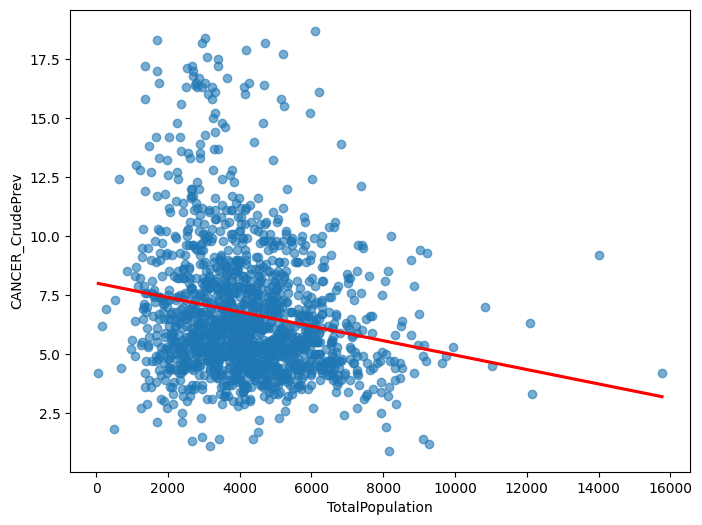

In [118]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [119]:
TractPopCancerCorr = Geo_Merge['TotalPopulation'].corr(Geo_Merge['CANCER_CrudePrev'])
print("Tract Correlation between Total Population and Crude Cancer Prevalence:","\n",TractPopCancerCorr)

Tract Correlation between Total Population and Crude Cancer Prevalence: 
 -0.1850145169194686


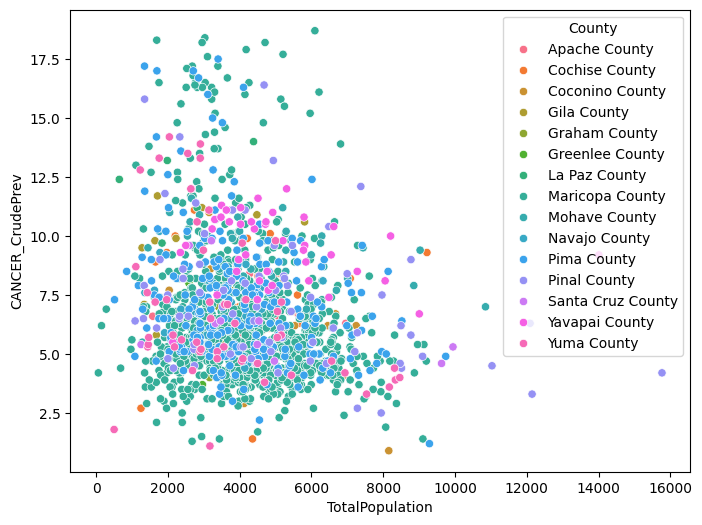

In [120]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="County")
plt.show()

In [121]:
# Average Crude Cancer Prev by County, with Total County Population

#Keep only county and total population columns:
county_pop = Geo_Merge[['County','TotalPopulation', 'CANCER_CrudePrev']]
county_pop.info()

# Sum the Total Population column by County:
sum_county_pop = Geo_Merge.groupby(['County'])['TotalPopulation'].sum().reset_index()

# Average Crude Cancer Prev by County:
avg_crude_cancer_pop = Geo_Merge.groupby(['County'])['CANCER_CrudePrev'].mean().reset_index()

# Create df using containing County name, Total Population for the County, and Average Crude Cancer Prev for the county
County_Col = ['County']
UniqueCounties1 = pd.DataFrame(UniqueCounties, columns = County_Col)

county_pop1 = pd.merge(UniqueCounties1, sum_county_pop, on='County', how = 'left')
county_pop1 = pd.merge(county_pop1, avg_crude_cancer_pop, on='County', how = 'left')
county_pop1.info()

print(county_pop1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            1520 non-null   object 
 1   TotalPopulation   1516 non-null   float64
 2   CANCER_CrudePrev  1516 non-null   float64
dtypes: float64(2), object(1)
memory usage: 35.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            15 non-null     object 
 1   TotalPopulation   15 non-null     float64
 2   CANCER_CrudePrev  15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 492.0+ bytes
               County  TotalPopulation  CANCER_CrudePrev
0       Apache County          71518.0          6.618750
1      Cochise County         131346.0          7.359375
2     Coconino County         134421.0   

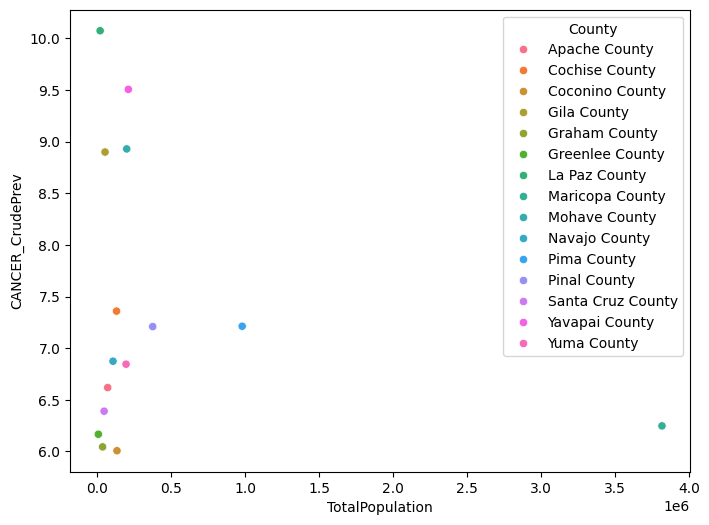

In [ ]:
# Plot Total Population by County versus Average Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.scatterplot(data=county_pop1, x="TotalPopulation",y="CANCER_CrudePrev", hue="County")
plt.show()

In [123]:
PopAvgCancerCorr = county_pop1['TotalPopulation'].corr(county_pop1['CANCER_CrudePrev'])
print("County Correlation between Total Population and Average Crude Cancer Prevalence:","\n",PopAvgCancerCorr)

County Correlation between Total Population and Average Crude Cancer Prevalence: 
 -0.22204020797901944


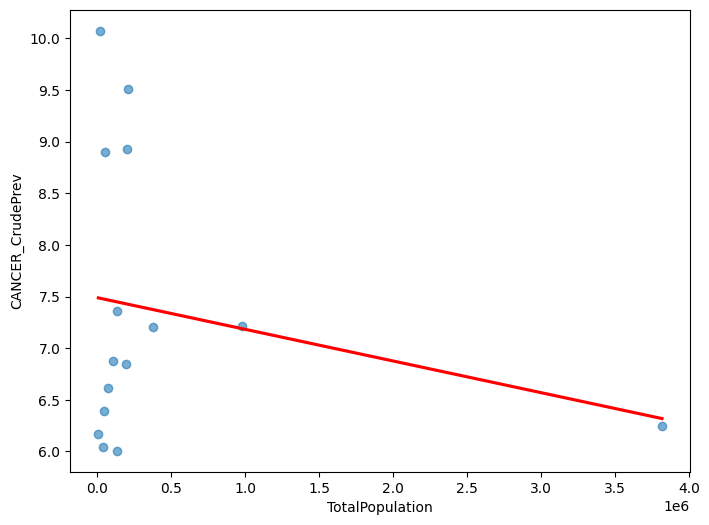

In [124]:
# Plot Total Population by County versus Average Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.regplot(data=county_pop1, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [137]:
# Compare Pop2010 column with TotalPopulation column

# Compare Pop2010 and TotalPopulation columns, return True if match, False if no match:
Geo_Merge['PopCompare'] =  Geo_Merge['Pop2010'] == Geo_Merge['TotalPopulation']
print(Geo_Merge[['CensusTract','County','Pop2010','TotalPopulation','PopCompare']])

PopCompare_Counts = Geo_Merge['PopCompare'].value_counts()
print("\n","Number of Records based on PopCompare Value:","\n",PopCompare_Counts)

PopMatchFalse = Geo_Merge[Geo_Merge['PopCompare'] == False]
print("\n","Records where PopCompare Value is FALSE:","\n",PopMatchFalse[['CensusTract','County','Pop2010','TotalPopulation','PopCompare']])

      CensusTract         County  Pop2010  TotalPopulation  PopCompare
0      4001942600  Apache County     1578           1578.0        True
1      4001942700  Apache County     5628           5628.0        True
2      4001944000  Apache County     6043           6043.0        True
3      4001944100  Apache County     5870           5870.0        True
4      4001944201  Apache County     4010           4010.0        True
...           ...            ...      ...              ...         ...
1515   4027011700    Yuma County     1230           1230.0        True
1516   4027011800    Yuma County     8316           8316.0        True
1517   4027012100    Yuma County     1467           1467.0        True
1518   4027980005    Yuma County      502            502.0        True
1519   4027980006    Yuma County     3172           3172.0        True

[1520 rows x 5 columns]

 Number of Records based on PopCompare Value: 
 PopCompare
True     1516
False       4
Name: count, dtype: int64

 Records

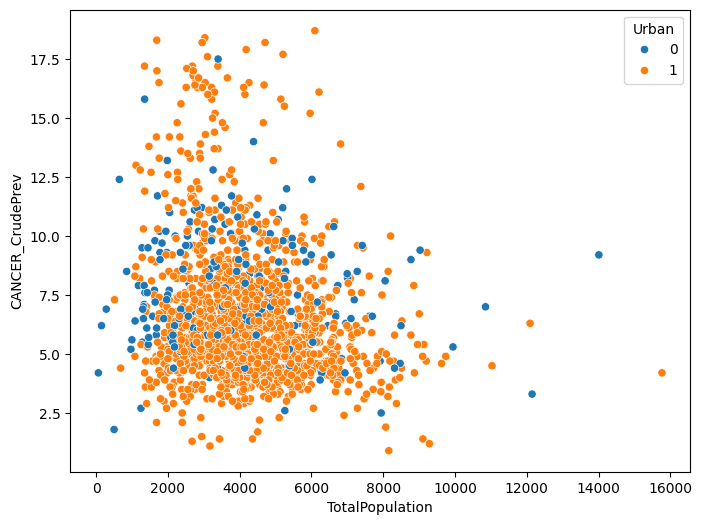

In [ ]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer based on Rural/Urban
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="Urban")
plt.show()

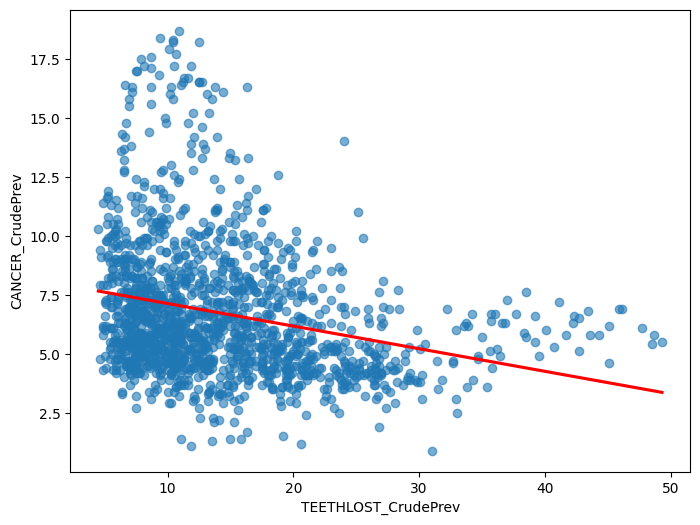

In [ ]:
# TeethLost Crude Prev vs Cancer Crude Prev by CensusTract
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [161]:
TractTeethCancerCorr = Geo_Merge['TEETHLOST_CrudePrev'].corr(Geo_Merge['CANCER_CrudePrev'])
print("Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence:","\n",TractTeethCancerCorr)

Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence: 
 -0.2560857204267746


In [145]:
# Average Crude Cancer Prev and Average Crude TeethLost Prev by County

#Keep only county and total population columns:
county_prev = Geo_Merge[['County','TEETHLOST_CrudePrev', 'CANCER_CrudePrev']]
county_prev.info()

# Average the Crude TeethLost column by County:
avg_crude_teeth = county_prev.groupby(['County'])['TEETHLOST_CrudePrev'].mean().reset_index()

# Average Crude Cancer Prev by County:
avg_crude_cancer = county_prev.groupby(['County'])['CANCER_CrudePrev'].mean().reset_index()

# Create df using containing County name, Average Crude TeethLost for the County, and Average Crude Cancer Prev for the county
County_Col = ['County']
UniqueCounties1 = pd.DataFrame(UniqueCounties, columns = County_Col)

county_crude_avg = pd.merge(UniqueCounties1, avg_crude_teeth, on='County', how = 'left')
county_crude_avg = pd.merge(county_crude_avg, avg_crude_cancer_pop, on='County', how = 'left')
county_crude_avg.info()

print(county_crude_avg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               1520 non-null   object 
 1   TEETHLOST_CrudePrev  1515 non-null   float64
 2   CANCER_CrudePrev     1516 non-null   float64
dtypes: float64(2), object(1)
memory usage: 35.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               15 non-null     object 
 1   TEETHLOST_CrudePrev  15 non-null     float64
 2   CANCER_CrudePrev     15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 492.0+ bytes
               County  TEETHLOST_CrudePrev  CANCER_CrudePrev
0       Apache County            30.112500          6.618750
1      Cochise County            17.509375          7.359375

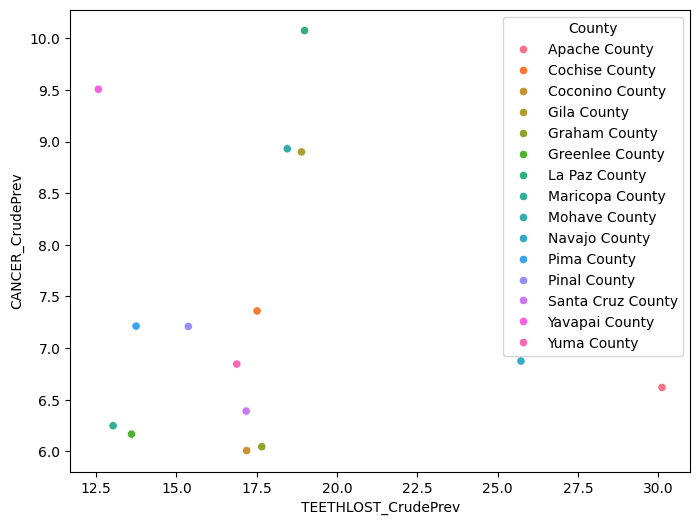

In [146]:
# Plot Average Crude Prevalence of Cancer versus Average Crude Prevalence of TeethLost by County
plt.figure(figsize=(8,6))
sns.scatterplot(data=county_crude_avg, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", hue="County")
plt.show()

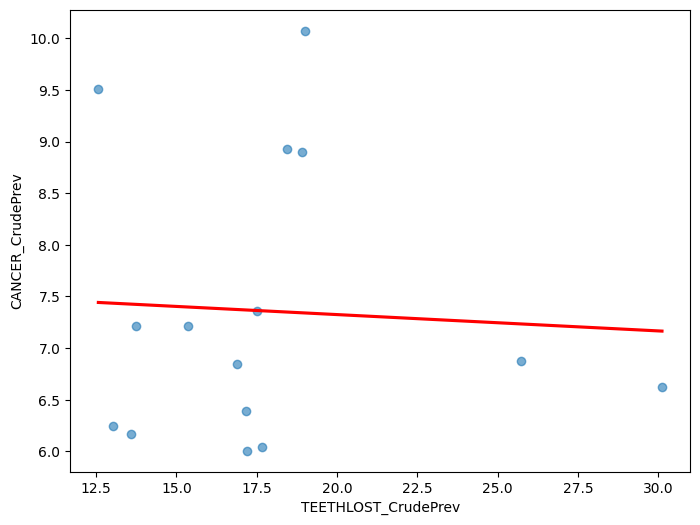

In [147]:
# Plot Average Crude Prevalence of Cancer versus Average Crude Prevalence of TeethLost by County
plt.figure(figsize=(8,6))
sns.regplot(data=county_crude_avg, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [ ]:
# Filter df to exclude Maricopa County:
Geo_Merge_Filter = Geo_Merge[Geo_Merge['County'] != 'Maricopa County']
Geo_Merge_Filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 1519
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CensusTract             607 non-null    int64  
 1   County                  607 non-null    object 
 2   Urban                   607 non-null    int64  
 3   Pop2010                 607 non-null    int64  
 4   LowIncomeTracts         607 non-null    int64  
 5   PovertyRate             607 non-null    float64
 6   laaian1                 522 non-null    float64
 7   laaian1share            522 non-null    float64
 8   TractHUNV               607 non-null    float64
 9   TractSNAP               607 non-null    float64
 10  StateAbbr               607 non-null    object 
 11  StateDesc               607 non-null    object 
 12  CountyName              607 non-null    object 
 13  CountyFIPS              607 non-null    float64
 14  TotalPopulation         607 non-null    float6

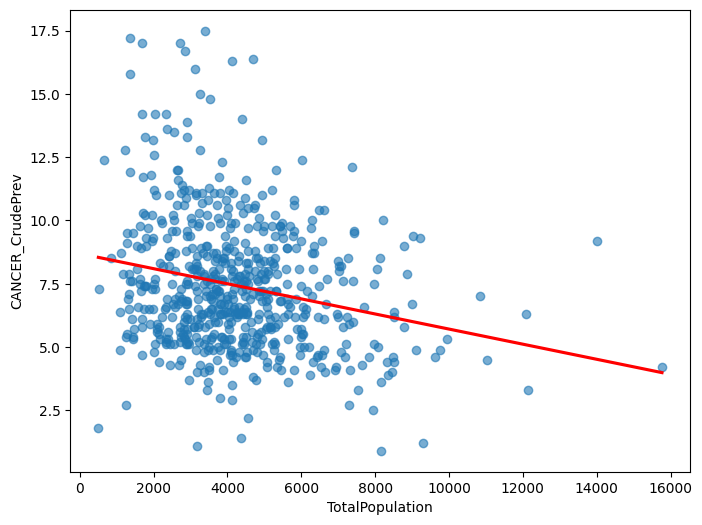

In [151]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge_Filter, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [152]:
TractPopCancerCorr_NoMar = Geo_Merge_Filter['TotalPopulation'].corr(Geo_Merge_Filter['CANCER_CrudePrev'])
print("Tract Correlation between Total Population and Crude Cancer Prevalence (Excl. Maricopa):","\n",TractPopCancerCorr_NoMar)

Tract Correlation between Total Population and Crude Cancer Prevalence (Excl. Maricopa): 
 -0.22605614084935402


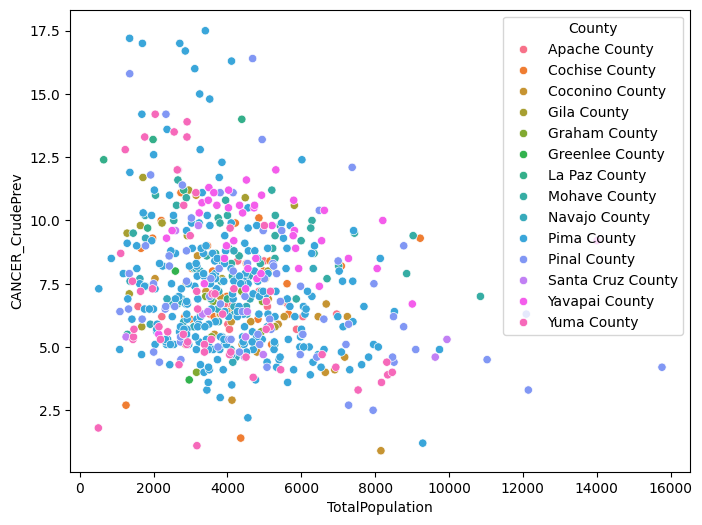

In [154]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge_Filter, x="TotalPopulation",y="CANCER_CrudePrev", hue="County")
plt.show()

In [155]:
# Filter County Pop df to exclude Maricopa County:
county_pop2 = county_pop1[county_pop1['County'] != 'Maricopa County']
county_pop2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            14 non-null     object 
 1   TotalPopulation   14 non-null     float64
 2   CANCER_CrudePrev  14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 448.0+ bytes


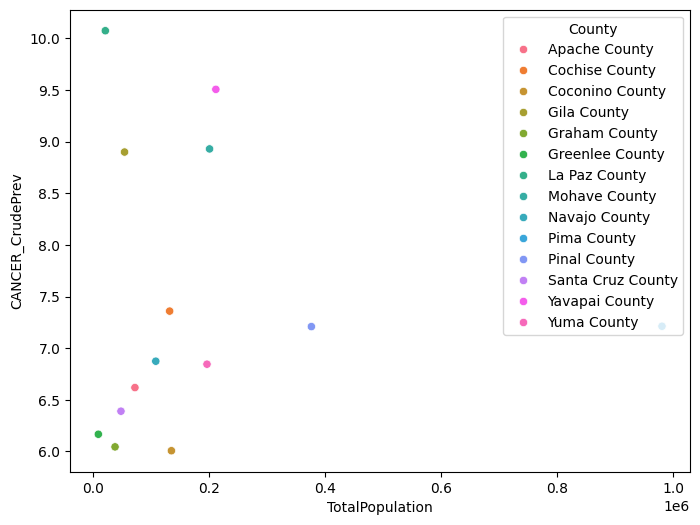

In [156]:
# Plot Total Population by County versus Average Crude Prevalence of Cancer, Excluding Maricopa
plt.figure(figsize=(8,6))
sns.scatterplot(data=county_pop2, x="TotalPopulation",y="CANCER_CrudePrev", hue="County")
plt.show()

In [158]:
PopAvgCancerCorr2 = county_pop2['TotalPopulation'].corr(county_pop2['CANCER_CrudePrev'])
print("County Correlation between Total Population and Average Crude Cancer Prevalence, Excl Maricopa County:","\n",PopAvgCancerCorr2)

County Correlation between Total Population and Average Crude Cancer Prevalence, Excl Maricopa County: 
 0.0021536047577577666


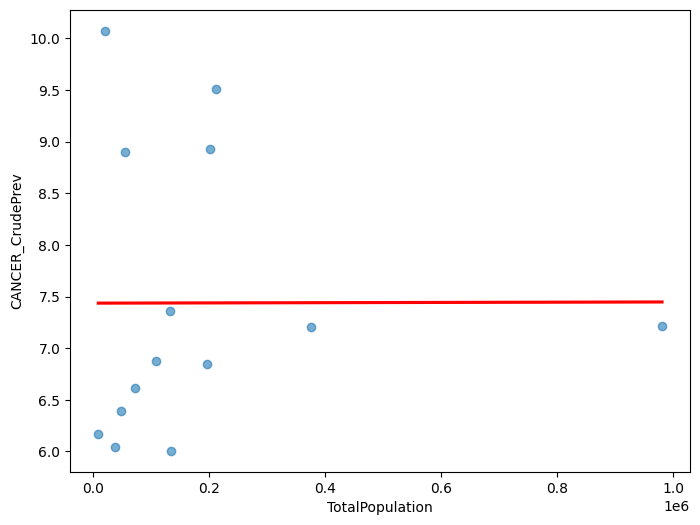

In [159]:
# Plot Total Population by County versus Average Crude Prevalence of Cancer, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.regplot(data=county_pop2, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

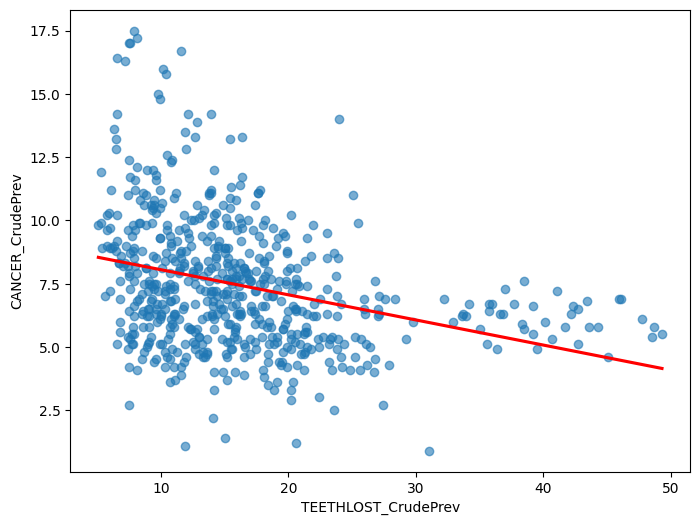

In [160]:
# TeethLost Crude Prev vs Cancer Crude Prev by CensusTract
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge_Filter, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.show()

In [162]:
TractTeethCancerCorr2 = Geo_Merge_Filter['TEETHLOST_CrudePrev'].corr(Geo_Merge_Filter['CANCER_CrudePrev'])
print("Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence, Excl Maricopa County:","\n",TractTeethCancerCorr2)

Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence, Excl Maricopa County: 
 -0.3176173310060017
